In [1]:
# POLYNOMIAL REGRESSION with GridSearchCV

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Position_Salaries.csv')
print(data)

X = data['Level']
y = data['Salary']

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [2]:
# Best parameters with GridSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_array = np.array(X).reshape(-1, 1)
y_array = np.array(y)

polynomial_model = make_pipeline(StandardScaler(), PolynomialFeatures(), LinearRegression())
params = {'polynomialfeatures__degree': np.arange(2, 8)}
grid = GridSearchCV(polynomial_model, params, cv=5, scoring='neg_mean_squared_error') 
grid.fit(X_array, y_array)

print(pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']])

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

   mean_test_score  std_test_score                             params
0    -5.521446e+10    5.736091e+10  {'polynomialfeatures__degree': 2}
1    -4.776566e+10    5.608805e+10  {'polynomialfeatures__degree': 3}
2    -3.177613e+10    4.244568e+10  {'polynomialfeatures__degree': 4}
3    -1.063338e+10    2.060015e+10  {'polynomialfeatures__degree': 5}
4    -4.601290e+10    7.282280e+10  {'polynomialfeatures__degree': 6}
5    -7.937499e+11    1.391738e+12  {'polynomialfeatures__degree': 7}
-10633381898.652973
{'polynomialfeatures__degree': 5}
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('linearregression', LinearRegression())])


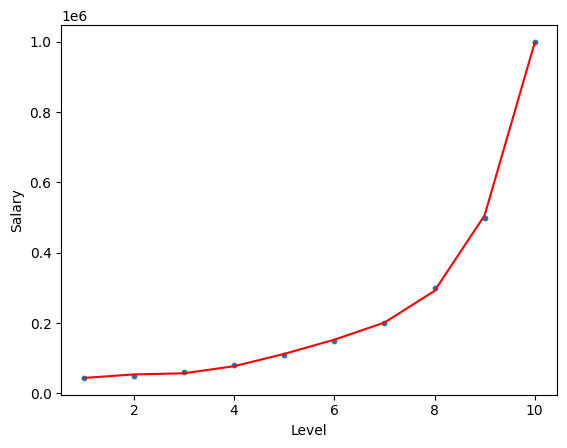

Score: 0.9997969027099755
Coefficients: [[ 0.00000000e+00  1.60731002e+05 -1.00378788e+05  2.81649184e+04
  -3.44638695e+03  1.57692308e+02]]
Intercept: [-41333.33332987]


In [3]:
# Polynomial Regression Model shaped by Best parameters

import operator

X_array = np.array(X)   
y_array = np.array(y)
x = X_array[:, np.newaxis]
y = y_array[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree = 5)
x_poly = polynomial_features.fit_transform(x)
polynomial_model = LinearRegression()
polynomial_model.fit(x_poly, y)

y_poly_pred = polynomial_model.predict(x_poly)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.scatter(x, y, s=10)
plt.plot(x, y_poly_pred, color='red')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

mod_score = polynomial_model.score(x_poly, y)
print('Score:', mod_score)
print('Coefficients:', polynomial_model.coef_)
print('Intercept:', polynomial_model.intercept_)
